In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
data = pd.read_csv(r"C:\Users\wnamr\iCloudDrive\Documents\UM\DSRP\Code\Twitter.csv", header=0)
print(data.shape)
print(list(data.columns))

(2705, 8)
['No.', 'label', 'content', 'source', 'sentiment', 'reply numbers', 'retweet numbers', 'likes numbers']


In [7]:
data['veracity'].value_counts()

T    1657
F     852
Name: veracity, dtype: int64

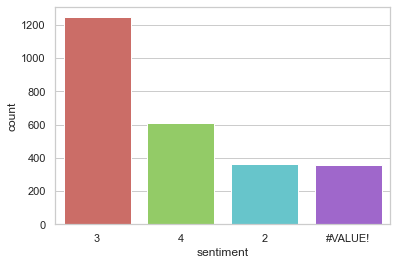

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='sentiment',data=data,palette='hls')
plt.show()
plt.savefig('logreg_plot')

In [10]:
count_true = len(data[data['veracity']=='T'])
count_false = len(data[data['veracity']=='F'])
pct_of_true = count_true/(count_true+count_false)
print("percentage of TRUE is", pct_of_true*100)
pct_of_false = count_false/(count_true+count_false)
print("percentage of FALSE is", pct_of_false*100)

percentage of TRUE is 66.04224790753288
percentage of FALSE is 33.95775209246712


In [15]:
# SENTIMENT
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

data = pd.read_csv(r"C:\Users\wnamr\iCloudDrive\Documents\UM\DSRP\Code\twitter_final.csv", header=0)

X = data.iloc[:, [0,1,3,4,5]].values
y = data.iloc[:, 2].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

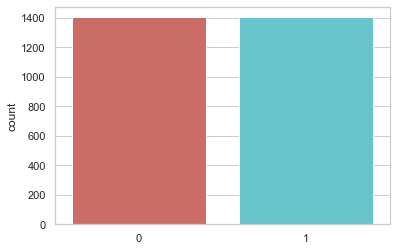

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x= y,data=data,palette='hls')
plt.show()
plt.savefig('logreg_plot')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[273  12]
 [  0 277]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       285
           1       0.96      1.00      0.98       277

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562

